In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('dataset/boston_housing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 1 and 2

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


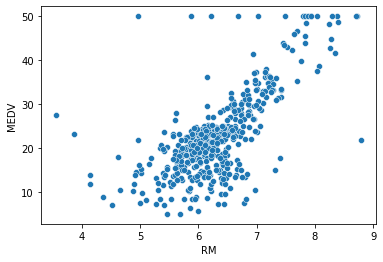

In [62]:
sns.scatterplot(df['RM'] , df['MEDV'])
plt.show()

In [63]:
x = pd.DataFrame(df.iloc[:,5])
x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [64]:
y = df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# 3

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , train_size=0.67 , random_state=2)

In [66]:
x_train

,RM
419,6.824
217,6.642
106,5.836
94,6.249
280,7.820
...,...
22,6.142
72,6.065
493,5.707
15,5.834


In [67]:
x_test

,RM
463,6.513
152,5.012
291,7.148
183,6.563
384,4.368
...,...
29,6.674
267,8.297
142,5.403
405,5.683


In [68]:
y_train

419     8.4
217    28.7
106    19.5
94     20.6
280    45.4
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: MEDV, Length: 339, dtype: float64

In [69]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
29     21.0
267    50.0
142    13.4
405     5.0
342    16.5
Name: MEDV, Length: 167, dtype: float64

# 4

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(x_train , y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(x_test)
x_pred=lr.predict(x_train)

In [113]:
y_pred.shape

(167,)

# 5

In [94]:
print(f"intercept : {lr.intercept_}")

intercept : -29.72900218649541


In [95]:
print(f"coefficient : {lr.coef_}")

coefficient : [8.30863137]


# 6

In [96]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

38.63468404740148


In [97]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test,y_pred)))

6.215680497532147


In [98]:
#from sklearn.metrics import score
#lr.score(y_test,y_pred)

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5655618834602316

In [100]:
a=1-(1-r2_score(y_test, y_pred))*((len(x_test)-1)/(len(x_test)-len(x_test.columns)-1))

In [101]:
a

0.5629289251781724

In [102]:
len(x_test)

167

In [103]:
y12=-29.72900218649541+(8.30863137*6.513)

In [104]:
y12

24.38511392631459

In [105]:
# np.array(x_test).reshape(len(x_test)

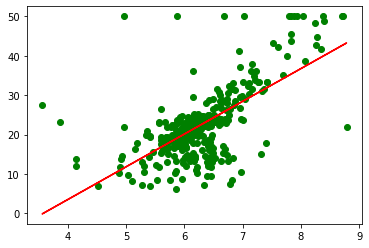

In [121]:
import seaborn as sns
import matplotlib.pyplot as mtp
mtp.scatter(x_train, y_train, color="green")   
mtp.plot (np.array(x_train).reshape(len(x_train)), x_pred, color="red")     
mtp.show()      

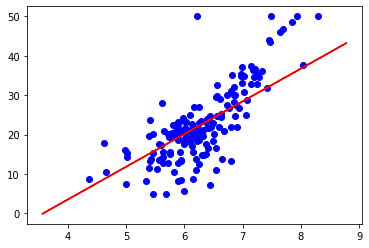

In [118]:
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(np.array(x_train).reshape(len(x_train)), x_pred, color="red")  

In [115]:
x_pred.shape

(339,)

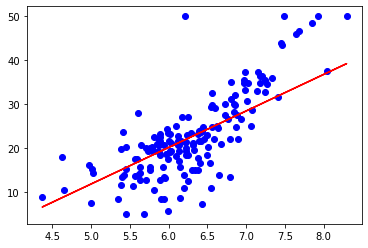

In [125]:
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(np.array(x_test).reshape(len(x_test)), y_pred, color="red")  